# PRUEBA CHI CUADRADA

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
import seaborn as sns

# Cargar el dataset Iris
iris = sns.load_dataset('iris')
print(iris.head())  # Ver las primeras filas del dataset

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Crear variables categóricas
iris['sepal_width_cat'] = np.where(iris['sepal_width'] > iris['sepal_width'].median(), 'alto', 'bajo')
iris['petal_length_cat'] = np.where(iris['petal_length'] > iris['petal_length'].median(), 'largo', 'corto')

# Ver el dataset con las nuevas columnas
print(iris[['sepal_width', 'sepal_width_cat', 'petal_length', 'petal_length_cat']].head())

   sepal_width sepal_width_cat  petal_length petal_length_cat
0          3.5            alto           1.4            corto
1          3.0            bajo           1.4            corto
2          3.2            alto           1.3            corto
3          3.1            alto           1.5            corto
4          3.6            alto           1.4            corto


In [4]:
# Crear variables categóricas
iris['sepal_width_cat'] = np.where(iris['sepal_width'] > iris['sepal_width'].median(), 'alto', 'bajo')
iris['petal_length_cat'] = np.where(iris['petal_length'] > iris['petal_length'].median(), 'largo', 'corto')

# Ver el dataset con las nuevas columnas
print(iris[['sepal_width', 'sepal_width_cat', 'petal_length', 'petal_length_cat']].head())

   sepal_width sepal_width_cat  petal_length petal_length_cat
0          3.5            alto           1.4            corto
1          3.0            bajo           1.4            corto
2          3.2            alto           1.3            corto
3          3.1            alto           1.5            corto
4          3.6            alto           1.4            corto


In [6]:
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(iris['sepal_width_cat'], iris['petal_length_cat'])
print(tabla_contingencia)

petal_length_cat  corto  largo
sepal_width_cat               
alto                 42     25
bajo                 33     50


In [7]:
# Realizar la prueba chi-cuadrada
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print(f"Estadístico chi-cuadrada: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Estadístico chi-cuadrada: 6.90523287178565
Valor p: 0.008594383152332723
Grados de libertad: 1
Frecuencias esperadas:
[[33.5 33.5]
 [41.5 41.5]]


Estadístico chi-cuadrada: Mide la discrepancia entre las frecuencias observadas y esperadas.

Valor p: Si es menor que 0.05, rechazamos la hipótesis nula y concluimos que hay una asociación significativa entre las variables.

Grados de libertad: Dependen del número de categorías en las variables.

Frecuencias esperadas: Son las frecuencias que esperaríamos si no hubiera asociación entre las variables.

### ANALISIS AVANZADO

In [8]:
print("Tabla de contingencia observada:")
print(tabla_contingencia)

print("\nFrecuencias esperadas bajo independencia:")
print(expected)

Tabla de contingencia observada:
petal_length_cat  corto  largo
sepal_width_cat               
alto                 42     25
bajo                 33     50

Frecuencias esperadas bajo independencia:
[[33.5 33.5]
 [41.5 41.5]]


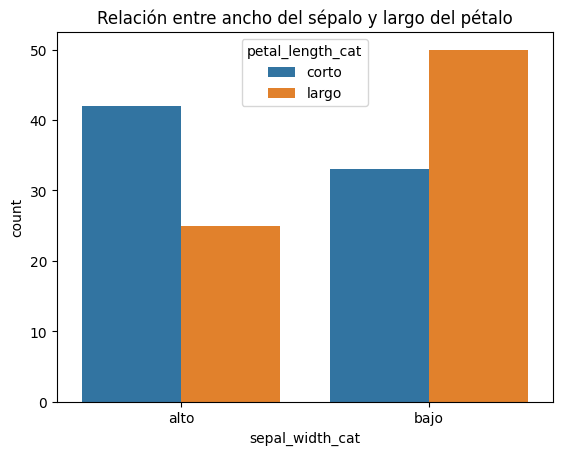

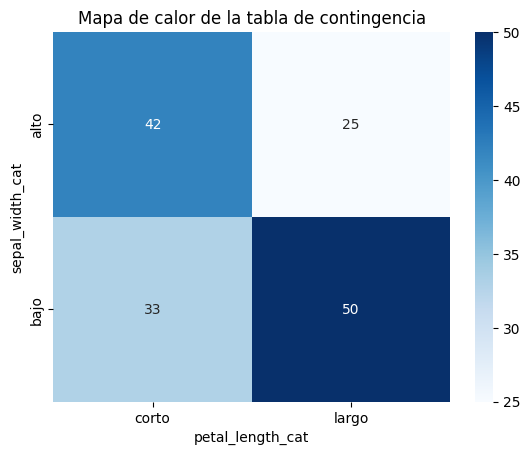

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
sns.countplot(data=iris, x='sepal_width_cat', hue='petal_length_cat')
plt.title("Relación entre ancho del sépalo y largo del pétalo")
plt.show()

# Mapa de calor
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues')
plt.title("Mapa de calor de la tabla de contingencia")
plt.show()